In [27]:
# import necessary packages
import matplotlib
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import pandas as pd

In [28]:
# read in JSON
filename = '../JSON/2017-03-14.SWSed.json'
dataSW1 = pd.read_json(filename)
filename2 = '../JSON/2017-03-21.SWSed.json'
dataSW2 = pd.read_json(filename2)

In [29]:
# Remove Duplicates from data
NoDupsDataSW1 = dataSW1.drop_duplicates()
len(NoDupsDataSW1)

NoDupsDataSW2 = dataSW2.drop_duplicates()
len(NoDupsDataSW2)

379

In [30]:
# Concatinate the two cleaned data frames into one data frame
data = pd.concat([NoDupsDataSW1, NoDupsDataSW2])
data = data.drop_duplicates()
data = data.dropna()
len(data)

417

In [31]:
# Clean Price Data
data['productPrice'] = data['productPrice'].str.replace('NEGOTIATE','.555')
data['productPrice'] = data['productPrice'].str.replace('Trade','.666')
data['productPrice'] = data['productPrice'].str.replace('SOLD','.777')
data['productPrice'] = data['productPrice'].str.replace('You','.111')
data['productPrice'] = data['productPrice'].str.replace('$','')
data['productPrice'] = data['productPrice'].str.replace('\xa0','')
data['productPrice'] = data['productPrice'].str.replace('.U.S','')
data['productPrice'] = data['productPrice'].str.replace(',','')
data['productPrice'] = data['productPrice'].str.split().str[0]
data['productPrice'] = data['productPrice'].str.split('+').str[0]
data['productPrice'] = data['productPrice'].astype(float)

In [32]:
# Sort Data by category
Sorted = data.sort_values(['productCategory'], ascending=False)

# Clean Description
data['productDescription'] = data['productDescription'].str.replace('\t\t\t', '')
data['productDescription'] = data['productDescription'].str.replace('\n', '')
data

,productCategory,productCondition,productDescription,productID,productLink,productLocation,productPrice,productTitle
0,Keyboard & MIDI,used,ASR-10 in excellent condition. Maxed Out at 16...,119253,https://tradingpost.sweetwater.com/119253-used...,85143,900.000,ensoniq asr 10
1,Microphones,new,"Hey guys selling a set of microphones, they ar...",119252,https://tradingpost.sweetwater.com/119252-new-...,Millersburg OH,400.000,applied microphone technology amt wi5iiv
2,Amps & Effects,like new,Like new peavey 6505mh with matched peavey cab...,119251,https://tradingpost.sweetwater.com/119251-like...,26554,550.000,peavey 6505mh with matched 1x12 cab
3,Keyboard & MIDI,like new,Akai mpc 2500 barley used! Good condition work...,119250,https://tradingpost.sweetwater.com/119250-like...,Roanoke VA,625.000,akai mpc 2500
4,Guitar & Bass,used,"Knaggs Severn Tier 2 for sale, $2200 cash only...",119249,https://tradingpost.sweetwater.com/119249-used...,"Maumee, OH",2200.000,knaggs severn tier 2
5,Mixers,like new,A like-new behringer MX9000 with power supply....,119248,https://tradingpost.sweetwater.com/119248-like...,n/a,500.000,behringer mx9000
6,Mixers,like new,there are 48 inputs and 16 outputs,119247,https://tradingpost.sweetwater.com/119247-like...,"Madrid,Spain",7500.000,m audio digico sd8
7,Guitar & Bass,used,2004 Gibson Les Paul Studio metallic black,119246,https://tradingpost.sweetwater.com/119246-used...,"Pomona, CA",700.000,gibson 2004 gibson les paul studio
8,Guitar & Bass,like new,Bought this strat 2 months ago I have entirely...,119245,https://tradingpost.sweetwater.com/119245-like...,30165,750.000,fender fender jimi hendrix stratocaster w gigbag
9,Mixers,like new,sound board\t\t,119244,https://tradingpost.sweetwater.com/119244-like...,"Hutto, TX",125.000,alesis multimix 8 firewire


In [33]:
# Questions to explore in data
# Guitar brands - Which brand is most available on market? 
#                 Which brand is considered most valuable?
#                 Mean, Median, Mode Prices for each brand

# Which state provides the most listings?

#

In [34]:
set(data.productCategory)

{' ',
 ' Amps & Effects',
 ' Computer Audio',
 ' Drums & Percussion',
 ' Guitar & Bass',
 ' Keyboard & MIDI',
 ' Microphones',
 ' Mixers',
 ' Other',
 ' Recorders & Players',
 ' Signal Processing',
 ' Speakers & Monitors'}

In [44]:
# DF of all fender guitars
fenders = data['productTitle'].str.contains('fender')
guitar = data['productCategory'] == ' Guitar & Bass'
fenderDF = data[fenders & guitar]
fenderDF

# get mean, median, max, and min on price of fenderDF
fenderMean = fenderDF['productPrice'].mean()
fenderMedian = fenderDF['productPrice'].median()
fenderMax = fenderDF['productPrice'].max()
fenderMin = fenderDF['productPrice'].min()

expensiveFender = data['productPrice'] == fenderMax
expensiveFender = data[fenders & expensiveFender & guitar]

fenderMin,fenderMax,fenderMedian,fenderMean

,productCategory,productCondition,productDescription,productID,productLink,productLocation,productPrice,productTitle
320,Guitar & Bass,used,"Great looking, playing and sounding 1965 all o...",118879,https://tradingpost.sweetwater.com/118879-used...,"Hollywood, FL",15995.0,fender 1965 stratocaster


In [47]:
# DF of all Gibson guitars
gibsons = data['productTitle'].str.contains('gibson')
guitar = data['productCategory'] == ' Guitar & Bass'
gibsonDF = data[gibsons & guitar]
gibsonDF

# get mean, median, max, and min on price of gibsonDF
gibsonMean = gibsonDF['productPrice'].mean()
gibsonMedian = gibsonDF['productPrice'].median()
gibsonMax = gibsonDF['productPrice'].max()
gibsonMin = gibsonDF['productPrice'].min()

expensiveGibson = data['productPrice'] == gibsonMax
expensiveGibson = data[gibsons & expensiveGibson & guitar]

cheapestGibson = data['productPrice'] == gibsonMin
cheapestGibson = data[gibsons&cheapestGibson&guitar]

gibsonMin,gibsonMax,gibsonMedian,gibsonMean


(  productCategory productCondition  \
 0   Guitar & Bass             used   
 
                                   productDescription productID  \
 0  1974 Les Paul Custom 20th anniversary black be...    119296   
 
                                          productLink productLocation  \
 0  https://tradingpost.sweetwater.com/119296-used...           95967   
 
    productPrice                                       productTitle  
 0        6650.0  gibson les paul custom 20th anniversary black ...  ,
     productCategory productCondition  \
 174   Guitar & Bass             used   
 
                                     productDescription productID  \
 174  2016 Gibson SG Faded with 490R/490T pickups. G...    119081   
 
                                            productLink productLocation  \
 174  https://tradingpost.sweetwater.com/119081-used...     Waco, Texas   
 
      productPrice     productTitle  
 174         535.0  gibson sg faded  )

In [37]:
# DF of all Epiphone Guitars
epiphones = data['productTitle'].str.contains('epiphone')
guitar = data['productCategory'] == ' Guitar & Bass'
epiphoneDF = data[epiphones & guitar]
epiphoneDF

# get mean, median, max, and min on price of epiphoneDF
epiphoneMean = epiphoneDF['productPrice'].mean()
epiphoneMedian = epiphoneDF['productPrice'].median()
epiphoneMax = epiphoneDF['productPrice'].max()
epiphoneMin = epiphoneDF['productPrice'].min()

# Determine most expensive and cheapest
expensiveEpiphone = data['productPrice'] == epiphoneMax
expensiveEpiphone = data[epiphones & expensiveEpiphone & guitar]
cheapestEpiphone = data['productPrice'] == epiphoneMin
cheapestEpiphone = data[epiphones&cheapestEpiphone&guitar]

epiphoneMin,epiphoneMax,epiphoneMedian,epiphoneMean

(320.0, 900.0, 400.0, 540.0)

In [48]:
# DF of all Ibanez Guitars
ibanez = data['productTitle'].str.contains('ibanez')
guitar = data['productCategory'] == ' Guitar & Bass'
ibanezDF = data[ibanez & guitar]
ibanezDF

# get mean, median, max, and min on price of ibanezDF
ibanezMean = ibanezDF['productPrice'].mean()
ibanezMedian = ibanezDF['productPrice'].median()
ibanezMax = ibanezDF['productPrice'].max()
ibanezMin = ibanezDF['productPrice'].min()

# Determine most expensive and cheapest
expensiveIbanez = data['productPrice'] == ibanezMax
expensiveIbanez = data[ibanez & expensiveIbanez & guitar]
cheapestIbanez = data['productPrice'] == epiphoneMin
cheapestIbanez = data[ibanez&cheapestIbanez&guitar]

ibanezMin,ibanezMax,ibanezMedian,ibanezMean

(269.0, 300.0, 297.5, 291.0)

In [39]:
# DF of all Microphones
mic = data['productCategory'] == ' Microphones'
microphonesDF = data[mic]

micMean = microphonesDF['productPrice'].mean()
micMedian = microphonesDF['productPrice'].median()
micMax = microphonesDF['productPrice'].max()
micMin = microphonesDF['productPrice'].min()

micMin, micMax, micMedian, micMean

(65.0, 5999.0, 625.0, 974.66666666666663)

In [40]:
# Find Most expensive and Cheapest Microphone
mic = data['productCategory'] == ' Microphones'

mostExpensiveMic = data['productPrice'] == micMax
mostExpensiveMic = data[mostExpensiveMic & mic]

cheapestMic = data['productPrice'] == micMin
cheapestMic = data[cheapestMic & mic]


mostExpensiveMic

,productCategory,productCondition,productDescription,productID,productLink,productLocation,productPrice,productTitle
234,Microphones,like new,THE KING OF MICS,119000,https://tradingpost.sweetwater.com/119000-like...,"Slidell, LA",5999.0,sony c 800g


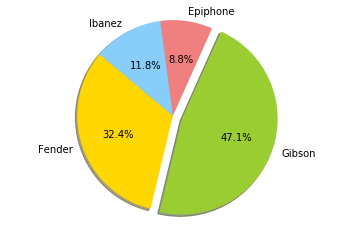

In [52]:
 # Data to plot
labels = 'Fender', 'Gibson', 'Epiphone', 'Ibanez'
sizes = [len(fenderDF), len(gibsonDF), len(epiphoneDF), len(ibanezDF)]
colors = ['gold', 'yellowgreen', 'lightcoral', 'lightskyblue']
explode = (0, 0.1, 0, 0)  # explode 1st slice
 
# Plot
plt.pie(sizes, explode=explode, labels=labels, colors=colors,
        autopct='%1.1f%%', shadow=True, startangle=140)
 
plt.axis('equal')
plt.show()

In [ ]:
# list most expensive and cheapest products